<a href="https://colab.research.google.com/github/joseortegalabra/MLBI/blob/master/Tarea2_MLBI_Jos%C3%A9_Ignacio_Ortega_Labra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2: Machine Learning for Business Intelligence

## Instrucciones

1. Esta tarea es de caracter individual, por lo tanto queda estrictamente prohibida la copia de codigo ajeno.

2. En caso de elaborar su respuesta **basandose** en código ajeno encontrado en la web, debe agradecer al menos citando la referencia.

3. La discusión con compañeros es siempre bienvenida, no obstante cada respuesta debe ser redactada de manera individual.

4. La fecha límite para la entrega de esta tarea queda establecida para el 15/06/2020.

Nota: La resolución de algunos de los ejercicios puede tomar bastante tiempo, así como su ejecución. Por lo tanto se recomienda hacer la tarea con anticipación y evitar riesgos.

## Pregunta 1: Construyendo una red neuronal desde cero

Para este ejercicio construiremos una red neuronal simple desde cero, la entrenaremos y veremos sus resultados. Para esto utilizaremos un dataset de juguete construido a partir de datos que provienen de dos Gaussianas multivariadas. El objetivo es generar un modelo capaz de clasificar entre estas dos Gaussianas.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as kr
from sklearn.metrics import accuracy_score

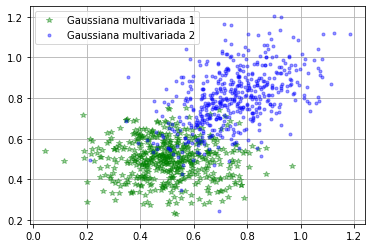

In [2]:
#Create Distribution Multivariant
mean1 = [0.5, 0.5]
cov1 = [[0.02, 0], [0, 0.01]]
x1 = np.random.multivariate_normal(mean1, cov1, 500)    #two features in x1
y1 = np.zeros((500,1), dtype='uint')    #one output y1  all ZEROS

mean2 = [0.75, 0.8]
cov2 = [[0.02, 0.01], [0.01, 0.02]]
x2 = np.random.multivariate_normal(mean2, cov2, 500)   ##two features in x2
y2 = np.ones((500,1), dtype='uint')   #one output y2 all ONES

x, y = np.concatenate((x1, x2), axis=0), np.concatenate((y1, y2), axis=0)

plt.plot(x1[:,0], x1[:,1], '*', label='Gaussiana multivariada 1', c='g', alpha=0.4)
plt.plot(x2[:,0], x2[:,1], '.', label='Gaussiana multivariada 2', c='b', alpha=0.4)
plt.legend()
plt.grid(True)
plt.show()

1.1 En este paso construiremos la red neuronal perceptron multicapa que utilizaremos para clasificar los datos provenientes de las dos Gaussianas multivariadas. Para esto utilizaremos las siguientes especificaciones:
1. Una capa oculta de 8 neuronas y una capa de salida de 1 neurona.
2. Función de activación sigmoide.
3. Función de divergencia de entropía cruzada binaria.


**Hint:**
Existen muchas formas de construir esta red y calcular sus parámetros, pero por simplicidad se sugiere un esquema como el que sigue (puede servir de guía, pero puede programar la red como estime conveniente):

```
class PerceptronMulticapa:
    '''
    primero definir una clase para la red neuronal, la cual recibe como parámetrs las dimensiones de entrada, 
    oculta y salida, asi como el learning rate necesario para la actualización de los parámetros.
    '''
    def __init__(self, inp_dim, hidden_dim, out_dim, lr):
        #definición de los parámetros de la red.
        # W1 = aleatorio
        # W2 = aleatorio
     
    def forward(self, x, y):
        '''
        Acá se calcula el valor predicho por la red, así como los valores intermedios de la capa oculta.
        Se deben tener en cuenta las funciones de activación y de costo. Estas y sus derivadas pueden 
        programarse como funciones aparte.
        '''
        # X^1 = f(W^1X^0)
        # X^2 = f(W^2X^1)
        # Loss(y,X^2)


    def backward(self, x, y):
        '''
        Acá se calculan los nuevos parámetros de la red utilizando el método de backpropagation 
        y gradient descent.
        '''
        # dW2 = Loss' * f(W^2X^1)' * (W^2X^1)'
        # dW1 = ...


        # W2 -= learnng_rate * dW2 
        # W1 -= learnng_rate * dW1
```

(10 pts.)

In [0]:
#FUNCION SIGMOIDE
'''
def sigmoid(x):
    "Numerically stable sigmoid function."
    if x >= 0:
        z = exp(-x)
        return 1 / (1 + z)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        z = exp(x)
        return z / (1 + z)
'''
#funcion sigmoide
from scipy.special import expit

#derivada sigmoide
def d_sigmoid(z, y):
  derivate = np.zeros((z.shape[0], z.shape[1], z.shape[1])) #tengo una tercera dimension al inicio para guardar el jacobiano de cada uno de los z de cada dato
  for i in range(z.shape[0]): #recorro datos
    for j in range(z.shape[1]): #recorro neurona
      for k in range(z.shape[1]): 
        if(j == k):  #jacobiano de una funcion scalar es una matriz diagonal
          derivate[i][j][k] = expit(z[i][j]) * (1 - expit(z[i][j]))   
        else:
          derivate[i][j][k] = 0 #funcion de activacion escalar   
  return derivate

In [0]:
#### LOSS Binary crossentropy
'''
def loss_binary_crossentropy(y_real, y_predicho): #funciona tanto para vector horizontal o vertical
  print('ESTOY EN LA FUNCIÓN DE LA LOSS')
  print('Y REAL', y_real)
  print('Y PREDICHO', y_predicho)
  loss = -y_real * np.log(y_predicho) - (1.0 - y_real) * np.log(1.0 - y_predicho)
  print('LOSS', loss)
  return loss.mean()
'''

def loss_binary_crossentropy(y_real, y_predicho):
  loss = []
  for i in range(y_real.shape[1]):
    if(y_real[0][i] == 1):
      loss.append(- np.log(y_predicho[0][i]))
    else:  #y real es igual a cero
      loss.append(- np.log(1.0 - y_predicho[0][i]))
  loss = np.array(loss)
  return loss.mean()

def derv_loss_binary_crossentropy(y_pred, y_real):   #entrada tengo el orden (N°neuronas ultima capa, N°Datos)  (1, N datos)
#CAMBIO EL ORDEN PARA QUE QUEDE EN MATRIZ(N°DATOS, N°NEURRONAS DE ULTIMA CAPA) para poder hacer la retroprogación del error
  y_pred = y_pred.T
  y_real = y_real.T
  derv = np.zeros((y_pred.shape[0], 1))
  for i in range(y_pred.shape[0]):
    if(y_real[i] == 1):
      derv[i] = -1/y_pred[i]
    else:
      derv[i] = 1/(1 - y_pred[i])
  return derv

In [0]:
def calculate_grad_Z(grad_y, d_f_act, z, y):
  #para evaluar el jacobiano en cada punto de Z, Z tiene que estar en el formato traspuesto ocupado en back (100X1) 100 datos x 1 neurona
  z = z.T
  y = y.T
  jacobian = d_f_act(z, y)  #jacobiano que obtengo es una matriz (data, (numero neuronas, numero neuronas))   #matriz de 3 dimensiones (datos, 4x4) 4 neuronas  
  grad_Z = []
  for i in range(grad_y.shape[0]):
    grad_Z.append(grad_y[i] @ jacobian[i])
  grad_Z = np.array(grad_Z).reshape(grad_y.shape[0], grad_y.shape[1])  #devuelve gradiente de z de igual tamaño al gradiente de y
  return grad_Z

In [0]:
class model_nn():
  def __init__(self):
    #inicializar lista donde se guardaran los z, y, w, funciones de costos que utiliza el algoritmo para optimizar
    self.Z = [None]
    self.Y = [] #el y sub cero tiene un valor
    self.W = [] #dejo vacia la lista porque al crear los primeros W ahi voy a agregar el None en la primera capa
    self.b = []
    self.f_act = [None]
    self.d_f_act = [None]

    #inicializar para hacer forward de conjunto de validación
    self.Z_valid = [None]
    self.Y_valid = [None]

    #Guardar valores de cada paso de gradiente en cada época
    self.Z_hist = []
    self.Y_hist = []
    self.W_hist = []
    self.b_hist = []
  
  def reset_params(self):#reiniciar para hacer otra corrida de forward con valores W guardados y las funciones de activacion. hacer nuevo paso del gradiente
    #reiniciar valores que tiene cada neurona al hacer cada paso del gradiente
    self.Z = [None]
    self.Y = [] 
    self.Z_valid = [None]
    self.Y_valid = []

  def add_layer(self,  n_neuron_actual, n_features = None, activation_function = None, derivate_act_function = None):
    if self.W: #no esta vacia la red neuronal
      self.W.append(np.random.normal(size = (n_neuron_actual, self.n_neuron_last_layer)))
      self.b.append(np.random.normal(size = (n_neuron_actual, 1)))   
      self.f_act.append(activation_function)
      self.d_f_act.append(derivate_act_function) 
      self.n_neuron_last_layer = n_neuron_actual

    else:  #esta vacia la red 
      self.W.append(None)
      self.b.append(None)
      self.W.append(np.random.normal(size = (n_neuron_actual, n_features)))
      self.b.append(np.random.normal(size = (n_neuron_actual, 1)))   
      self.f_act.append(activation_function) 
      self.d_f_act.append(derivate_act_function) 
      self.n_neuron_last_layer = n_neuron_actual

  def add_loss(self, loss_function, derivate_loss_function):  #definir la loss a utilizar
    self.loss = loss_function
    self.d_loss = derivate_loss_function

  def forward_pass(self, data_train):  #forward pass del cojunto de entrenamiento. Batch del conjunto de entrenamiento
    self.Y.append(data_train)  #asigno y[k = 0] primera capa
    for k in range(1, len(self.W)):  #para cada una de las capas 
      #expandir dimensiones de y agregando el 1 y aumentar dimension de pesos al juntar las matrices weights y bias
      Y_exp = np.vstack((np.ones(data_train.shape[1]), self.Y[k-1])) #en cada iteracion agrego el 1 
      W_exp = np.hstack(( self.b[k] , self.W[k] ))  #juntar weights y bias auxiliar para calculos
      self.Z.append(W_exp @ Y_exp)
      self.Y.append( self.f_act[k](self.Z[k]) )

  def forward_pass_2(self, data_train, data_valid):  #forward pass del batch de entrenamiento y de todos los datos de validación
    self.Y.append(data_train)  
    self.Y_valid.append(data_valid)
    for k in range(1, len(self.W)): 
      Y_exp = np.vstack((np.ones(data_train.shape[1]), self.Y[k-1]))
      Y_exp_valid = np.vstack((np.ones(data_valid.shape[1]), self.Y_valid[k-1]))
      W_exp = np.hstack(( self.b[k] , self.W[k])) 
      self.Z.append(W_exp @ Y_exp)
      self.Z_valid.append(W_exp @ Y_exp_valid)
      self.Y.append( self.f_act[k](self.Z[k]))
      self.Y_valid.append( self.f_act[k](self.Z_valid[k]))

  def backward_pass(self, y_real):
    self.N = len(self.Y) - 1  #cantidad de capas creadas (capa 0, capa 1, capa2, capa3)
    
    #crear gradientes en cada back y actualizarlos en la iteración
    self.grad_Y = [0 for i in range(len(self.Y))] #inicializar gradientes de las variables que necesito. Inicializar variables para cada layer
    self.grad_Z = [0 for i in range(len(self.Y))] 
    self.grad_W = [0 for i in range(len(self.Y))] 
    self.grad_b = [0 for i in range(len(self.Y))] 

    while (self.N > 0):  #desde la ultima capa a la primera
      if (self.N  == len(self.Y) - 1):   #solo para la ultima capa
        self.grad_Y[self.N] =  model.d_loss(self.Y[self.N], y_real)   #derivada de la Loss
      else:  #caso contrario que no estoy en la ultima capa
        self.grad_Y[self.N] = self.grad_Z[self.N + 1] @ self.W[self.N + 1]

      #calcular gradiente de z necesito la derivada de la funcion de activacion evaluada en Z
      #en escalar solo necesito evaluar en z, en vectorial softmax necesito el valor de z ademas de valor de y
      self.grad_Z[self.N] =  calculate_grad_Z(self.grad_Y[self.N], self.d_f_act[self.N],self.Z[self.N], self.Y[self.N])
      self.grad_W[self.N] = self.Y[self.N - 1] @ self.grad_Z[self.N]
      self.grad_b[self.N] = np.ones((1, self.Y[0].shape[1])) @ self.grad_Z[self.N]
      self.N -=1

  def update_weights(self, lr):
    for k in range(1, len(self.W)):
      self.W[k] = self.W[k] - ( lr /  self.Y[0].shape[1] ) * self.grad_W[k].T
      self.b[k] = self.b[k] - ( lr /  self.Y[0].shape[1] ) * self.grad_b[k].T

In [0]:
#funciones para ir calibrando entremedio

In [0]:
def suffle_data(x, y):
  #x e y tiene que estar en formato de matrices de train_test_split (dato, feature), (dato, salida)
  #RETURN PARA RED NEURONAL (FEATURE, DATO)  ,  (SALIDA, DATO)
  data = np.hstack(( x, y ))
  data_index = np.hstack(( np.array(    [[i] for i in range(x.shape[0])]   ) , data ))
  np.random.shuffle(data_index)
  x_shuffle = data_index[:, 1: data_index.shape[1]-y.shape[1] ].T
  y_shuffle = data_index[:, 1+x.shape[1]:].T
  return x_shuffle, y_shuffle

In [0]:
def get_batch(x, y, size_batch, i):   #entrada y salida en formato (feature, data)
  return x[: , i*size_batch : i*size_batch+size_batch ], y[: , i*size_batch : i*size_batch+size_batch ]

In [0]:
def get_pred(y_horizontal_2d):
  y_horizontal = y_horizontal_2d.reshape(y_horizontal_2d.shape[1]).copy()
  for i in range(y_horizontal.shape[0]):
    if(y_horizontal[i] >= 0.5):
      y_horizontal[i] = 1
    else:
      y_horizontal[i] = 0
  return y_horizontal

1.2 Utilizando los datos proveídos construya los un conjunto de entrenamiento(60%), validación (20%) y test (20%). Asegurese de que al menos en el conjunto de entrenamento los datos se encuentren aleatorizados respecto a su clase. 

(3 pts.)

In [11]:
X_tv, X_test, y_tv, y_test = train_test_split(x, y, test_size = 200, random_state = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X_tv, y_tv, test_size = 200, random_state = 1)
print('Train size X', X_train.shape)
print('Train size y', y_train.shape)

print('\nValid size X', X_valid.shape)
print('Valid size y', y_valid.shape)

print('\nTest size X', X_test.shape)
print('Test size y', y_test.shape)

Train size X (600, 2)
Train size y (600, 1)

Valid size X (200, 2)
Valid size y (200, 1)

Test size X (200, 2)
Test size y (200, 1)


In [0]:
def visualize_train_valid_test(x_train, x_valid, x_test, y_train, y_valid, y_test):
  fig, axs = plt.subplots(3, 1, figsize = ((7,20)) )
  #plot train
  axs[0].scatter(x_train[:, 0], x_train[:, 1], c = y_train, alpha = 0.5, marker = 'x')
  axs[0].set_title('Data Train', fontsize = 25)

  #plot valid
  axs[1].scatter(x_valid[:, 0], x_valid[:, 1], c = y_valid, alpha = 0.5, marker = 'x')
  axs[1].set_title('Data Valid', fontsize = 25)

  #plot test
  axs[2].scatter(x_test[:, 0], x_test[:, 1], c = y_test, alpha = 0.5, marker = 'x')
  axs[2].set_title('Data Test', fontsize = 25)

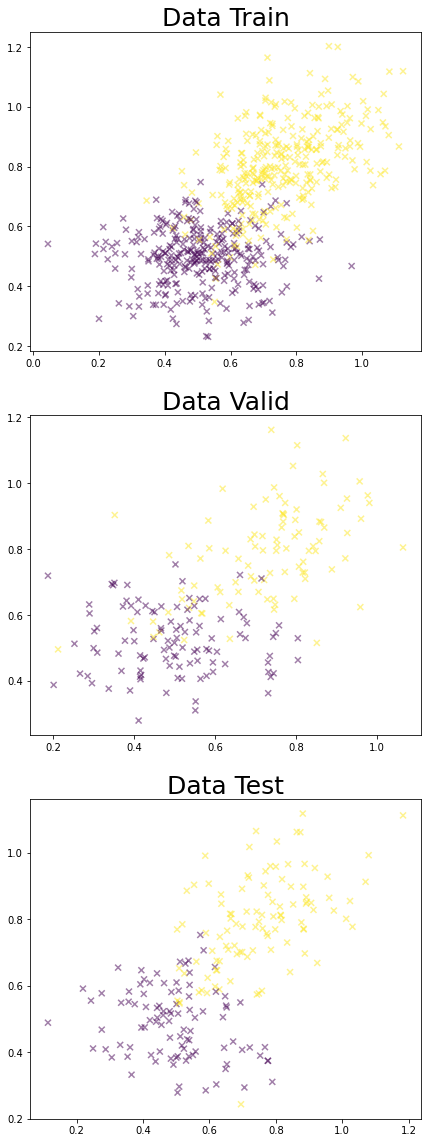

In [13]:
visualize_train_valid_test(X_train, X_valid, X_test, y_train, y_valid, y_test)

1.3 Entrene la red neuronal construida en el primer paso, variando el learning rate en cada entrenamiento. Se pide probar con las siguientes alternativas: [1, 0.1, 0.01, 0.001, 0.0001, 0.00001].
Por cada entrenamiento utilize al menos 300 épocas y muestre la curvas de aprendizaje para accuracy y loss. 
Las curvas deben ser construidas utilizando el conjunto de entrenamiento y de validación.

¿Cuál es la mejor alternativa de learning rate para el problema propuesto? ¿Por qué? 

(7 pts.)

## Using my multilayer perceptron

In [14]:
#ordenar dimensiones para que coinciden con codigo creado (train = data, feature) (valid = feature, data) -> formato de ingreso
#a la red neuronal
X_train_mlp = X_train.copy()
y_train_mlp = y_train.reshape(y_train.shape[0], 1).copy()
X_valid_mlp = X_valid.T.copy()
y_valid_mlp = y_valid.reshape(y_valid.shape[0], 1).T.copy()

print('Train size X', X_train_mlp.shape)
print('Train size y', y_train_mlp.shape)

print('\nValid size X', X_valid_mlp.shape)
print('Valid size y', y_valid_mlp.shape)

Train size X (600, 2)
Train size y (600, 1)

Valid size X (2, 200)
Valid size y (1, 200)


In [15]:
model = model_nn()
model.add_layer(8, 2, activation_function = expit, derivate_act_function = d_sigmoid) #crear capa con 8 neuronas y la anterior(inicial) tiene 2 features
model.add_layer(1, activation_function = expit, derivate_act_function = d_sigmoid)  #crear capa con 1 neurona
model.add_loss(loss_binary_crossentropy, derv_loss_binary_crossentropy)  #crear loss

print('Weights')
print('Weights First Layer', model.W[1].shape)
print('Weights Second Layer', model.W[2].shape)
print('\n Activation function', model.f_act)
print('Derivate activation function', model.d_f_act)
print('Loss:', model.loss, 'Derivate_loss:', model.d_loss)

Weights
Weights First Layer (8, 2)
Weights Second Layer (1, 8)

 Activation function [None, <ufunc 'expit'>, <ufunc 'expit'>]
Derivate activation function [None, <function d_sigmoid at 0x7f1f53f79840>, <function d_sigmoid at 0x7f1f53f79840>]
Loss: <function loss_binary_crossentropy at 0x7f1f53f79f28> Derivate_loss: <function derv_loss_binary_crossentropy at 0x7f1f53f79ea0>


In [0]:
#Parameters
epoch = 300
lr = 0.01
size_batch = 30  #number of observation in each batch
num_batches = int(X_train_mlp.shape[0] / size_batch)       #cantidad de batches, mejor un numero exacto para evitar no pasar algunos datos

In [0]:
loss_train = []    #métricas en train y validacion
acc_train = []

loss_valid = []
acc_valid = []

for i in range(epoch):  #para cada época
  loss_batch_train = 0   #incializar el contador de la loss en train para luego promediar
  acc_batch_train = 0   #inicializar el contador del acc en train para luego promediar
  
  #shuffle de todo el train set
  X_shuffled, y_shuffled = suffle_data(X_train_mlp, y_train_mlp)  #obtengo el suffled en formato para nn (feature, data)

  for j in range(num_batches):  #para cada batch
    X_train_batch, y_train_batch = get_batch(X_shuffled, y_shuffled, size_batch , j)  #obtener el batch del suffle de datos 

    ###FORWARD PASS
    #IF SI ESTOY EN EL ULTIMO PASO DE GRADIENTE DE LA ÉPOCA ACTUALIZO LA LOSS DE TRAIN Y DE VALID porque como lo programe se pueden guardar los pesos
    #pero hacer el forward con pesos guardados no esta programado, no asi hacer el forward inmediatamente al calcular los pesos haciendo que para los objetivos
    #del problema tampoco sea necesario guardar los pesos de cada layer en cada paso de gradiente de cada epoca
    if(j == num_batches - 1):  #estoy en el ultimo paso del gradiente de la época hago forward de train y valid   
      model.forward_pass_2(X_train_batch, X_valid_mlp)
      loss_batch_train += model.loss(y_train_batch, model.Y[-1])
      acc_batch_train +=  accuracy_score( y_train_batch.reshape(y_train_batch.shape[1]),  get_pred( model.Y[-1] ) )  #para evaluar el acc tiene que estar en formato(x, ) y train y valid en número entero
      #valid
      loss_valid.append(model.loss(y_valid_mlp, model.Y_valid[-1]))
      acc_valid.append(accuracy_score(y_valid_mlp.reshape(y_valid_mlp.shape[1]), get_pred(model.Y_valid[-1]) )  )   #real y predicho

    else:  #no esoty en el último paso del gradiente de la época y solo hago el forward de train
      model.forward_pass(X_train_batch)  
      loss_batch_train += model.loss(y_train_batch, model.Y[-1])   #calcular la loss de la regresión en ese forward con el batch
      acc_batch_train +=  accuracy_score( y_train_batch.reshape(y_train_batch.shape[1]),  get_pred( model.Y[-1] )  )

    ###BACK PASS
    model.backward_pass(y_train_batch)  #calcular gradientes
    model.update_weights(lr)   #actualizo los pesos

    #TERMINO UN PASO DE GRADIENTE, reinicio los y, z que estan guardados en las neuronas y los borro para almacenar los valores de un nuevo paso de gradiente
    model.reset_params()      

  #promedio de la loss y acc de train en cada época
  loss_train.append(  loss_batch_train/num_batches )
  acc_train.append(acc_batch_train/num_batches)

300


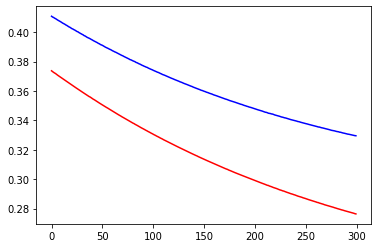

In [49]:
print(len(loss_train))
#LOSS
plt.plot(loss_train, 'red')
plt.plot(loss_valid, 'blue')

In [50]:
loss_train[-1]

0.27639895354163235

300


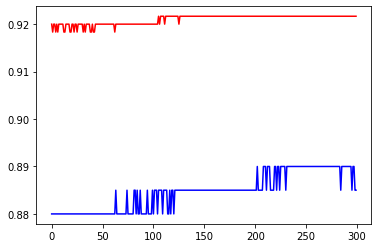

In [51]:
print(len(acc_train))
#ACCURACY
plt.plot(acc_train, 'red')
plt.plot(acc_valid, 'blue')

## Using Keras

In [0]:
model_MLP_keras = kr.Sequential()
l1 = model_MLP_keras.add(kr.layers.Dense(8, activation = 'sigmoid'))
l2 = model_MLP_keras.add(kr.layers.Dense(1, activation = 'sigmoid'))

opt = kr.optimizers.SGD(learning_rate=0.001)
model_MLP_keras.compile(
    loss = 'binary_crossentropy',
    optimizer = opt,
    metrics = 'accuracy'
)

history = model_MLP_keras.fit(
    X_train,
    y_train, 
    batch_size = 30,
    verbose = 0,
    epochs = 300,
    validation_data = (X_valid, y_valid)
)

In [0]:
def visualize_results(train_loss, val_loss, train_acc, val_acc):
  fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = ((14, 7)))
  ax = axs[0]
  ax.set_title('Loss', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_loss, label = 'loss_train', color = 'black', linestyle = '-')
  ax.plot(val_loss, label = 'loss_test', color = 'orange')
  ax.set_xlabel('Epochs', fontsize = 13)
  ax.legend()

  ax = axs[1]
  ax.set_title('Accuracy', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_acc, label = 'acc_train', color = 'black', linestyle = '-')
  ax.plot(val_acc, label = 'acc_test', color = 'orange')
  ax.set_xlabel('Epochs', fontsize = 13)
  plt.legend()

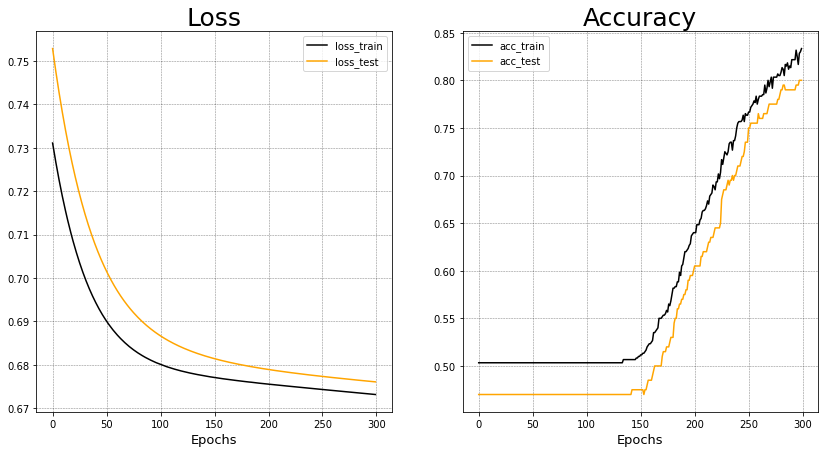

In [60]:
visualize_results(history.history['loss'], history.history['val_loss'], history.history['accuracy'], history.history['val_accuracy'])

## Pregunta 2: Entendiendo las operaciones convolucionales

En este apartado vamos a investigar de manera gráfica cuál es el resultado de una operación de convolución, que corresponde a la capacidad de una red convolucional de generar representaciones a partir de una imágen.

<img src="images/cute_cat.jpeg" alt="drawing" width="400"/>

2.1 Cargue a imagen anterior como una matriz NumPy. Luego normalice la imagen de tal forma que sus valores estén dentro del rango [-0.5, 0.5]

(3 pts.)

In [0]:
# Su respuesta aquí.

2.2 Elija dos kernel de tamaño 3x3 (ej. border detection, sharpen, box blur kernels, etc. Estos los puede encontrar [acá](https://en.wikipedia.org/wiki/Kernel_(image_processing))) y convolucione la imagen con cada uno de ellos. Para esto puede ocupar su propia función de convolución o utilzar la función [scipy.ndimage.filters.convolve](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.convolve.html), utiizando borde constante.

(6 pts.)

In [0]:
# Su respuesta aquí.

2.3 Una vez convolucionada la imagen, convierta a cero los valores menores a cero. Para esto puede usar la función [np.clip](https://numpy.org/doc/1.18/reference/generated/numpy.clip.html). En otras palabras:
```
if x < 0:
    x = 0
else:
    x = x

```
(2 pts)

In [0]:
# Su respuesta aquí.

2.4 Implemente por su cuenta la operación de agregación estadística Max-Pooling. Para esto utilice kernel_size=4 y stride=4.

(6 pts.)

In [0]:
# Su respuesta aquí.

2.5 Muestre los resultados de las operaciones realizadas. ¿Qué puede decir acerca de ellos? ¿Cómo cree que estas operaciones pueden ser de utilidad para una red neuronal a la hora de realizar una tarea de clasificación?

(3 pts.)

In [0]:
# Su respuesta aquí.

# Pregunta 3: Construyendo una Red Convolucional

The Street View House Numbers ([SVHN](http://ufldl.stanford.edu/housenumbers/)) [1] es un conocido dataset, comunmente utilizado como benchmark para probar y comparar modelos de Machine Learning. Este dataset contiene imágenes de números de casa vistos desde la calle, los cuales se encuentran etiquetados y dicha etiqueta se asocia al dígito que se encuentra al centro de la imagen.

<img src="images/svhn.png" alt="drawing" width="400"/>


Los datos se encuentran públicamente disponibles a continuación:
1. [train set](http://ufldl.stanford.edu/housenumbers/train_32x32.mat)
2. [test set](http://ufldl.stanford.edu/housenumbers/test_32x32.mat)


[1] Netzer, Y., Wang, T., Coates, A., Bissacco, A., Wu, B., Y Ng, A.: Reading Digits in Natural Images with Unsupervised Feature Learning. NIPS (2011)

3.1 Cargue las imagenes y etiquetas del set de entrenamiento y test como matrices NumPy. Las etiquetas van del número del '1' al '10', donde la décima etiqueta se asocia al valor 0. Cambie el valor de la etiqueta '10', para que cada etiqueta quede asociada al dígito que representa. Finalmente, grafique 9 imágenes del conjunto de entrenamiento.

(3 pts.)

In [0]:
# Su respuesta aquí.

3.2 Para terminar el preprocesamiento de los datos, se pide que las etiquetas se presenten como variables categóricas. Esto es, para la etiqueta: 
```
0 = [1, 0, ... , 0]
1 = [0, 1, ... , 0]
...
N = [0, 0, ... , 1]
```
Además, se pide seleccionar un conjunto de validación para poder monitorear el sobreajuste del modelo sobre los datos de entrenamiento. Se pide que un 20% de los datos de entrenamiento sean utilizados para validación.

(3 pts.)

In [0]:
# Su respuesta aquí.

3.3 Para construir red convolucional, se utilizará una modificación la famosa arquitectura arquitectura AlexNet, propuesta por Alex Krizhevsky [2] [(lectura obligatoria)](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf).

Se pide especificamente construir una red convoucional con la siguiente arquitectura:

| Layer  | Operation|  Kernel |  Stride |  Activation | Maxpooling (stride) | Dropout (prob) |
|---|---|---|---|---|---|---|
|  1 | Convolución (32)  |  (3,3) |  1 |  ReLU |  No | No |
|  2 |  Convolución (32) | (3,3)  |  1 | ReLU  |  Yes (2,2) | No |
|  3 |  Convolución (64) | (3,3)  |  1 | ReLU  |  No | No |
|  4 |  Convolución (64) | (3,3)  |  1 | ReLU  |  Yes (2,2) | Yes(0.25) |
|  5 |  Densa (512) | -  | - | ReLU  | No | Yes(0.5) |
|  5 |  Densa (10) | -  | - | Softmax  | No | No |


Calcule el número de parámetros a dicha arquitectura.

[2] Krizhevsky, A., Sutskever, I., Hinton, G.: ImageNet Classification with Deep Convolutional Neural Networks. NIPS (2012)

(8 pts.)

In [0]:
# Su respuesta aquí.

3.4 Entrene esta red neuronal utilizando la función de costos correspondiente y las siguientes consideraciones:

1. Optimizador Adam (lr=0.0001)
2. batch size = 64 
3. Número de epocas = 10

**OBS: debe tener en cuenta que el proceso de entrenamiento CPU puede demorar algunas horas. Si dispone de GPU (o utiliza coblab), puede acelerar este proceso y demorarse incluso minutos**

(3 pts.)

In [0]:
# Su respuesta aquí.

3.5 Grafique dos curvas de aprendizaje, donde en el eje x se muestre el número de épocas y en el eje y se muestre la función de pérdida / accuracy respectivamente. Este gráfico debe contener los valores para el conjunto de entrenamiento, validación y el resultado final medido sobre el conjunto de test.

(3 pts.)

In [0]:
# Su respuesta aquí.